In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from joblib import dump

In [ ]:
data = pd.read_csv('dataset_sdn.csv')

In [ ]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
data.shape

(104345, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
##### Here we see that the label contains boolean values: 0 - Benign, 1-Maliciuous
data.label.unique()

array([0, 1])

In [ ]:
data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

# EDA

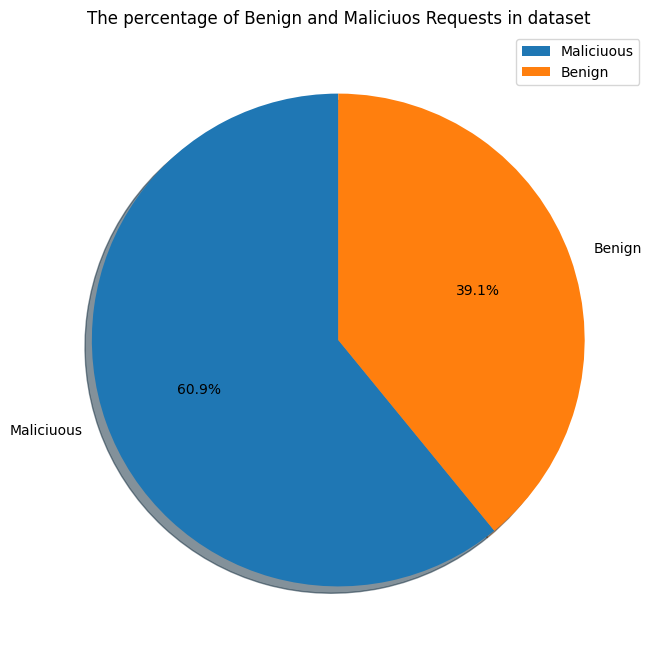

In [ ]:
labels = ["Maliciuous",'Benign']
sizes = [dict(data.label.value_counts())[0], dict(data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Benign"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [ ]:
data.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


Text(0.5, 1.0, 'Features which has NuLL values')

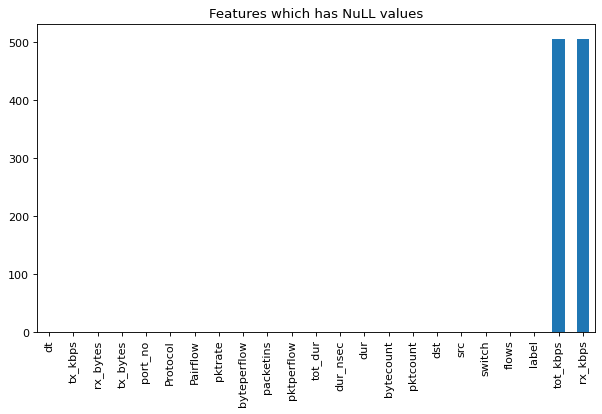

In [ ]:
# Let's look at the vizualisation of Null valued features
figure(figsize=(9, 5), dpi=80)
data[data.columns[data.isna().sum() >= 0]].isna().sum().sort_values().plot.bar()
plt.title("Features which has NuLL values")

In [ ]:
data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [ ]:
#### Let's support which columns NUMERIC and which is OBJECT

numeric_df = data.select_dtypes(include=['int64', 'float64'])
object_df = data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [ ]:
object_df.head()

,src,dst,Protocol
0,10.0.0.1,10.0.0.8,UDP
1,10.0.0.1,10.0.0.8,UDP
2,10.0.0.2,10.0.0.8,UDP
3,10.0.0.2,10.0.0.8,UDP
4,10.0.0.2,10.0.0.8,UDP


In [ ]:
df = data.copy()

In [ ]:
numeric_columns = ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec',
                   'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow',
                   'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes',
                   'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']

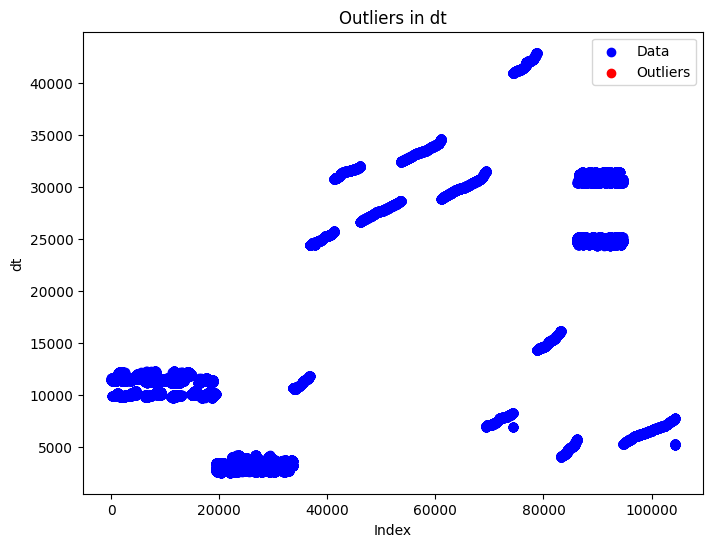

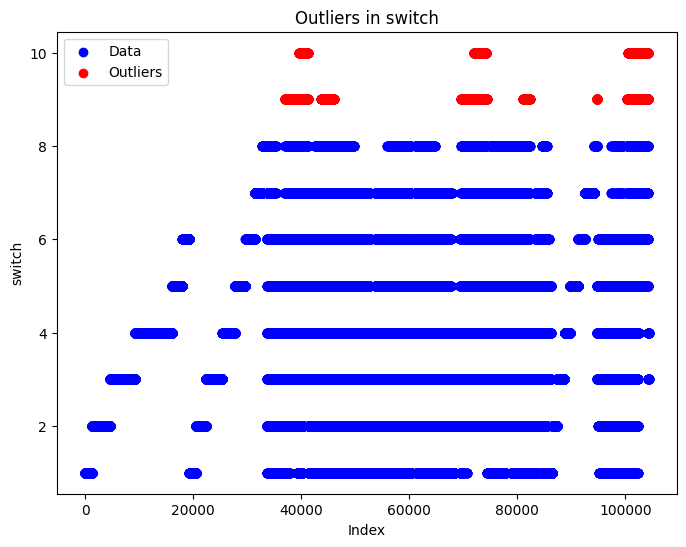

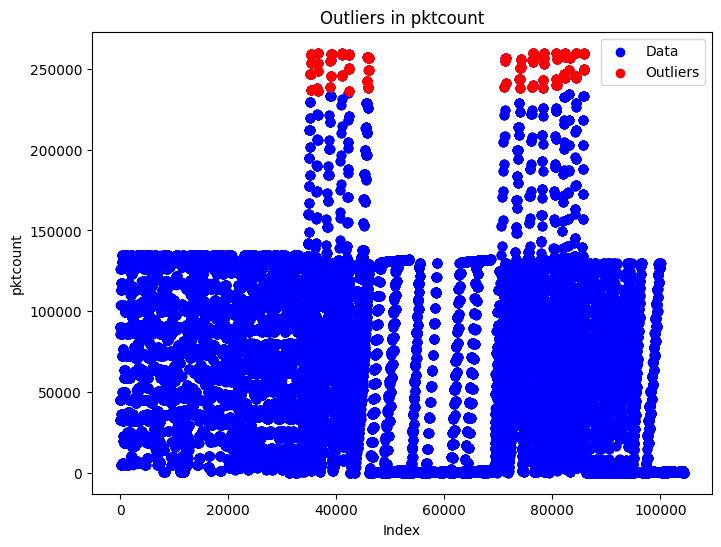

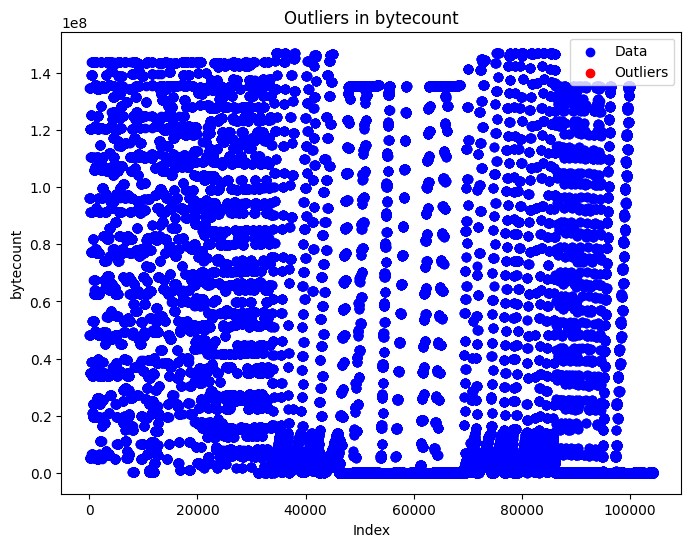

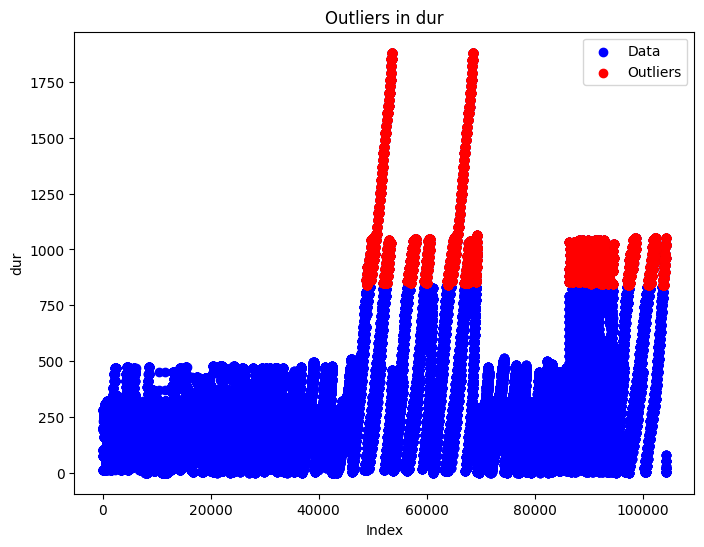

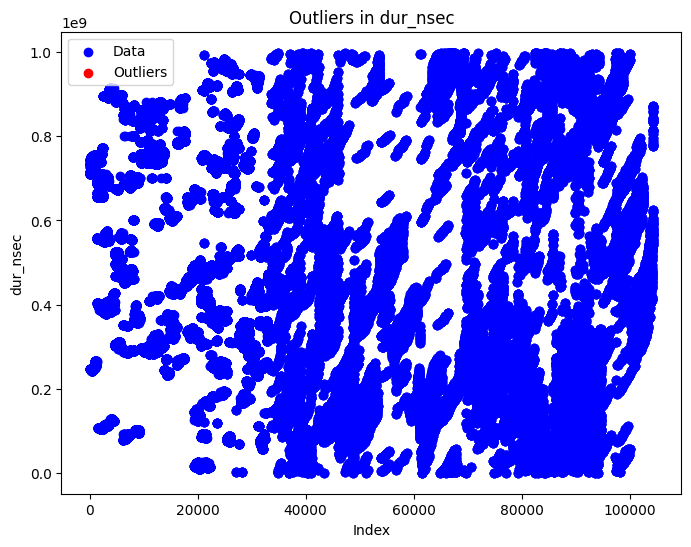

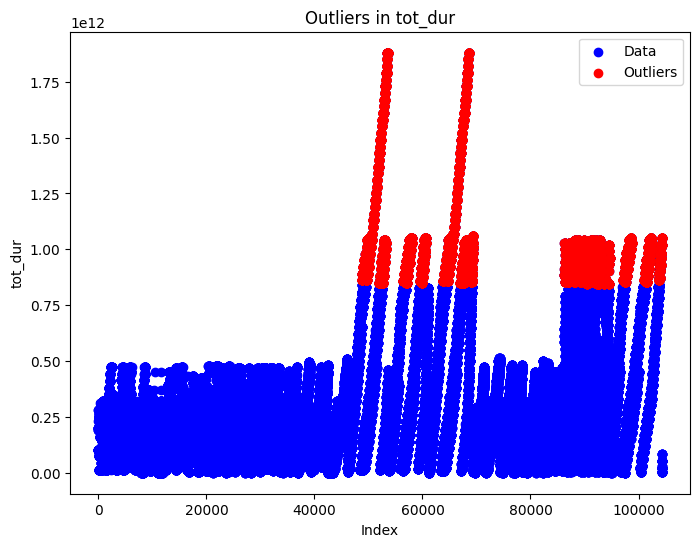

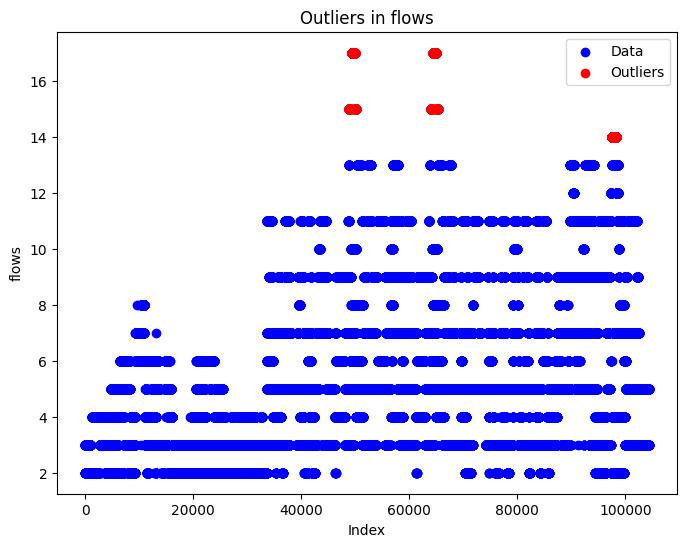

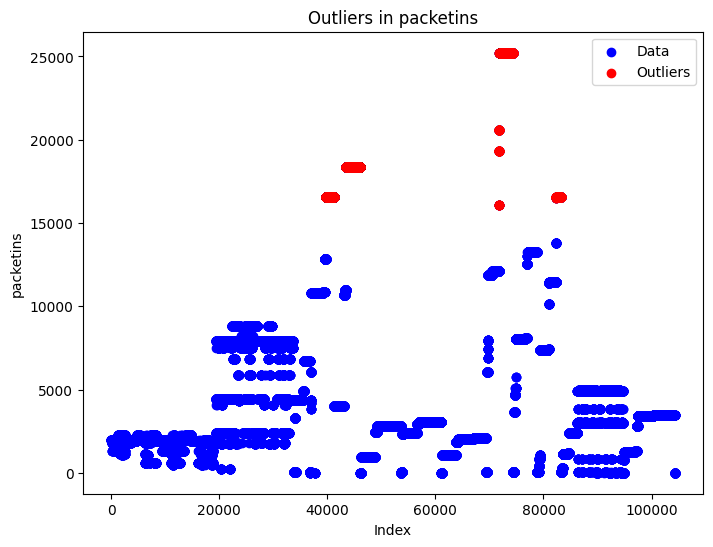

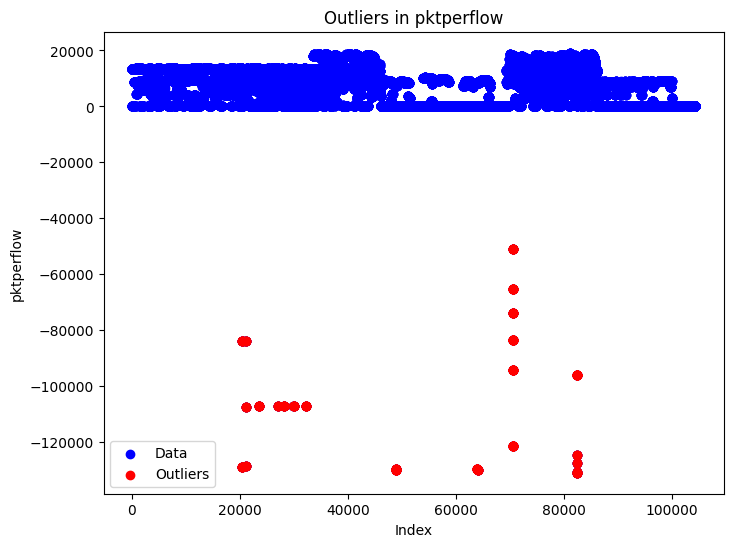

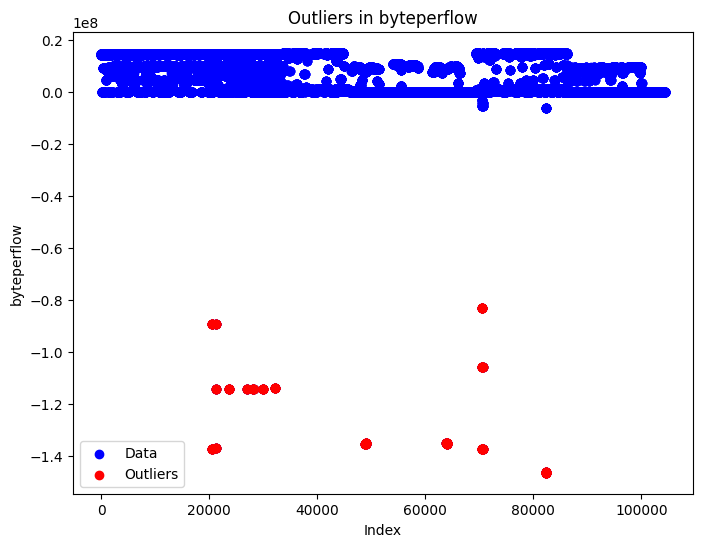

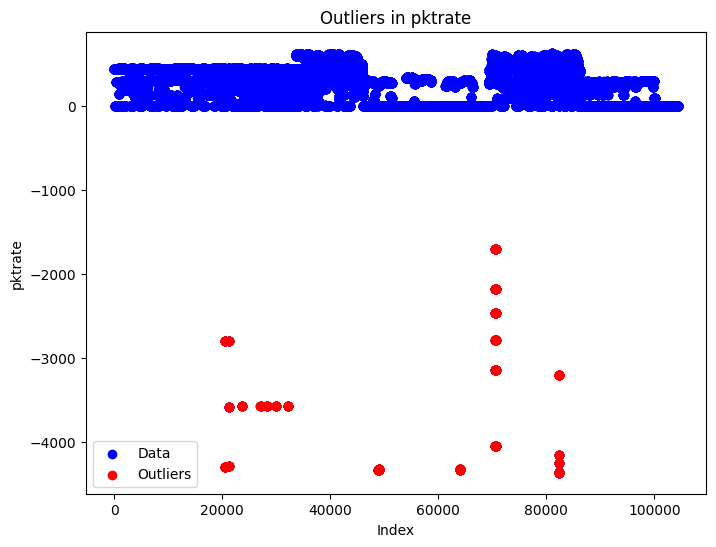

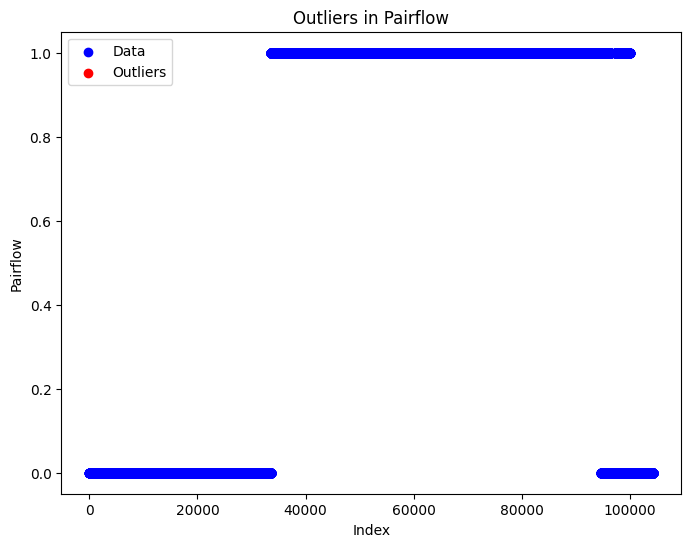

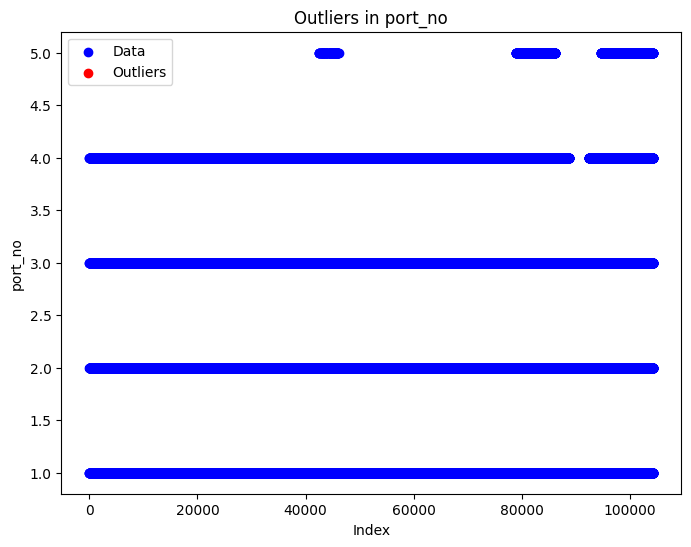

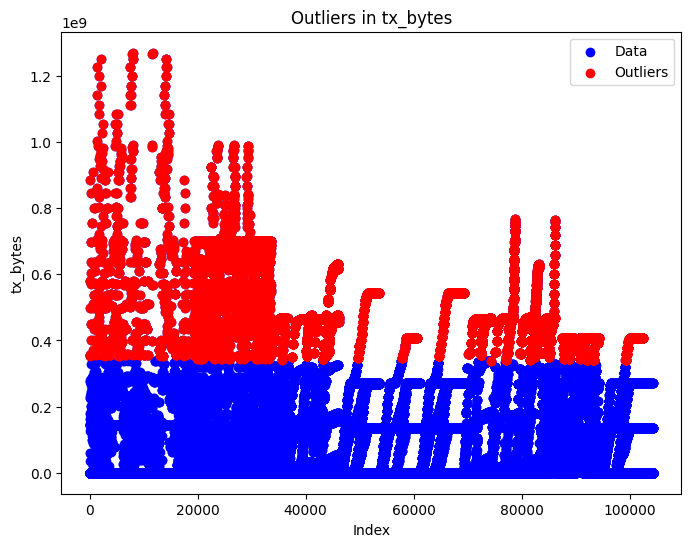

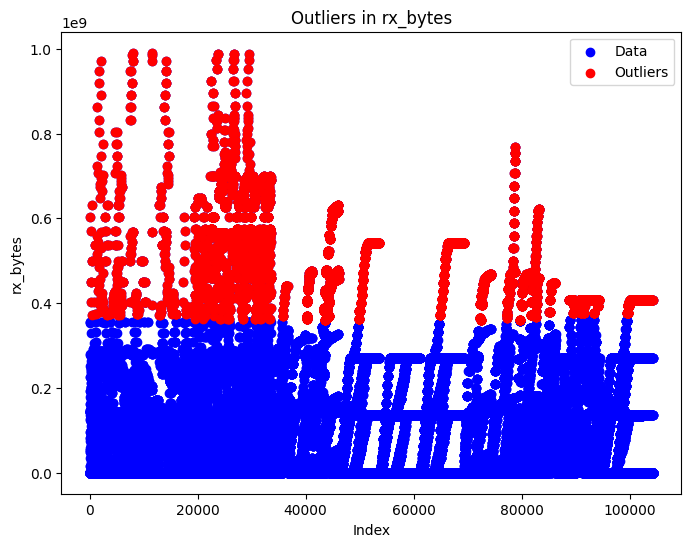

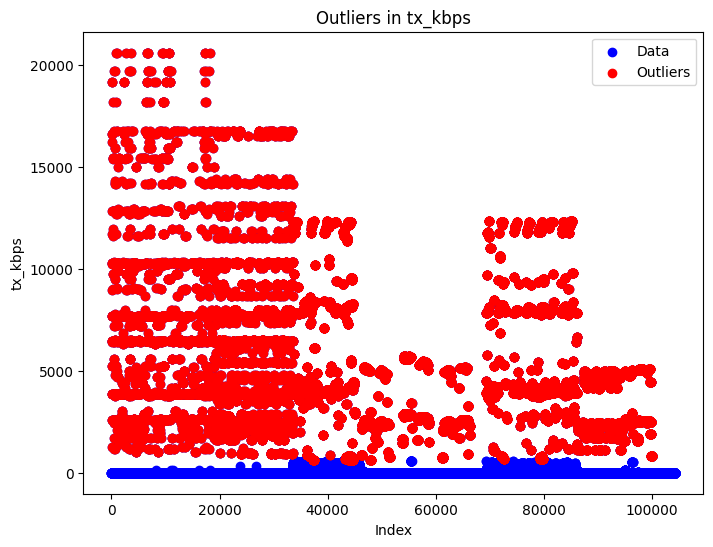

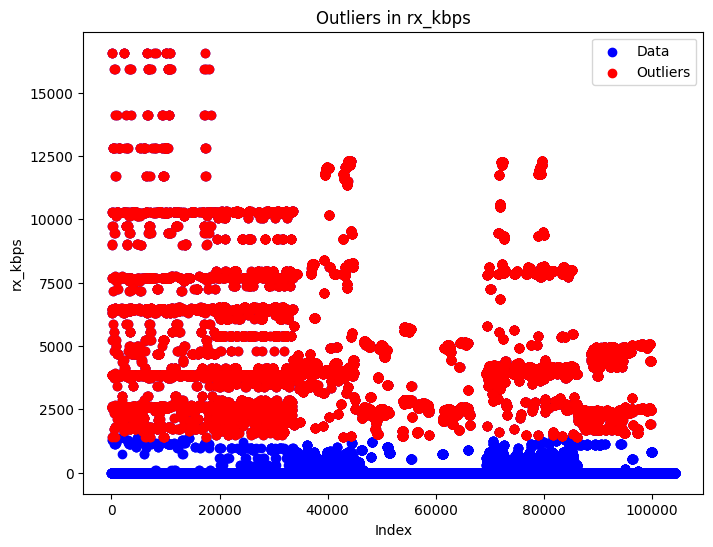

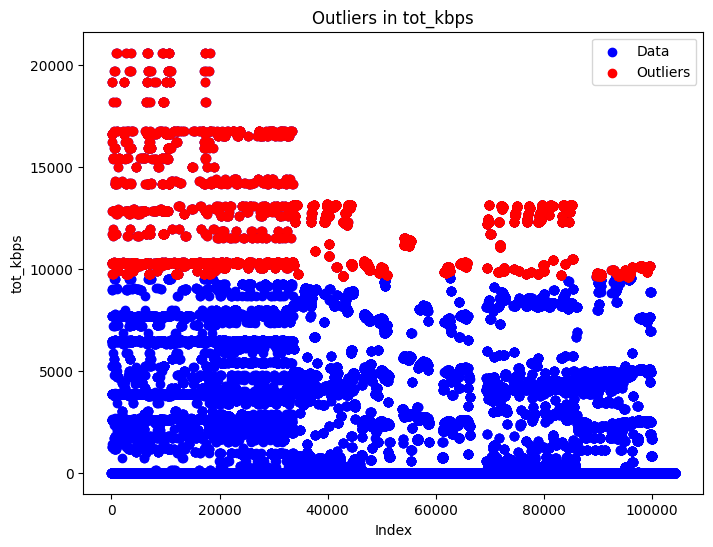

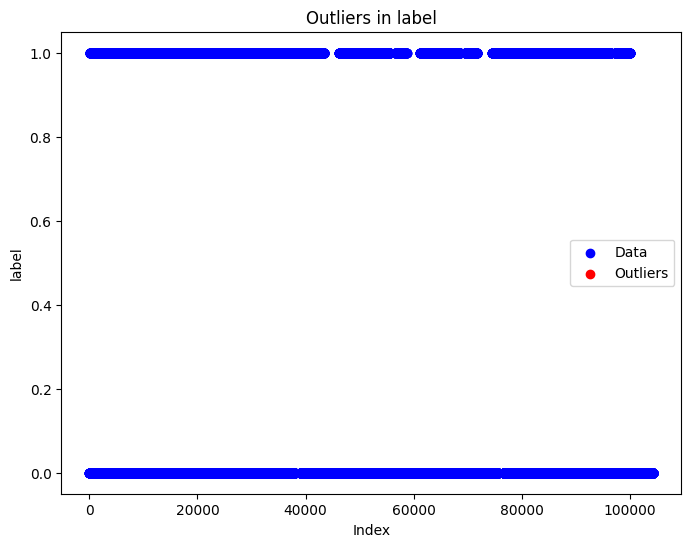

In [ ]:
# Plotting outliers for each numeric column
for column in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plotting outliers using scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[column], color='blue', label='Data')
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    plt.title(f'Outliers in {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

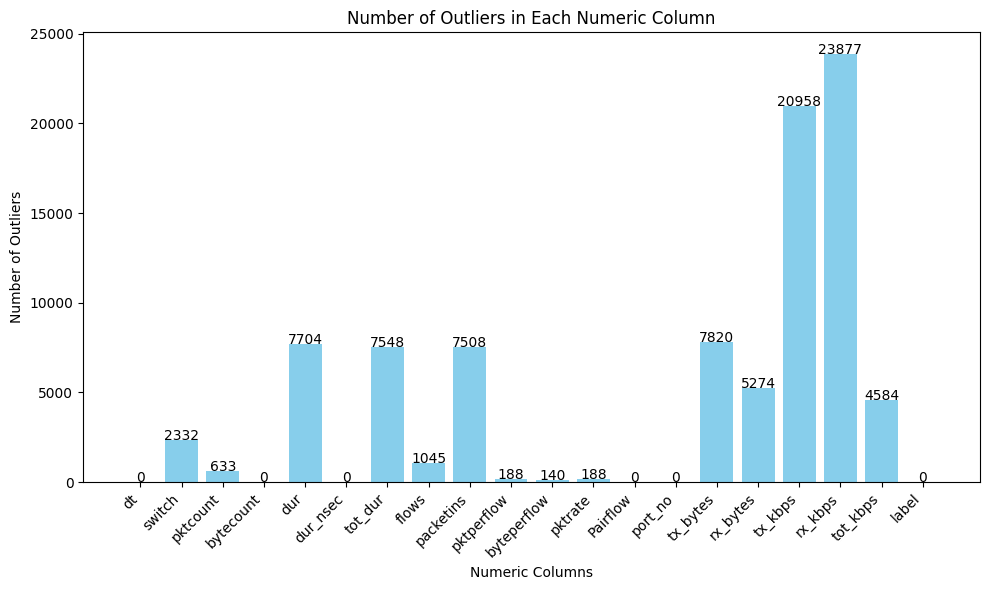

In [ ]:
outlier_counts = {}

# Iterate over each numeric column for outlier detection
for column in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Count the number of outliers for the column
    outlier_counts[column] = len(outliers)

# Create a bar plot of outlier counts
plt.figure(figsize=(10, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue')
plt.xlabel('Numeric Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Numeric Column')
plt.xticks(rotation=45, ha='right')

# Display the number of outliers on top of each bar
for column, count in outlier_counts.items():
    plt.text(column, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Number of all reqests')

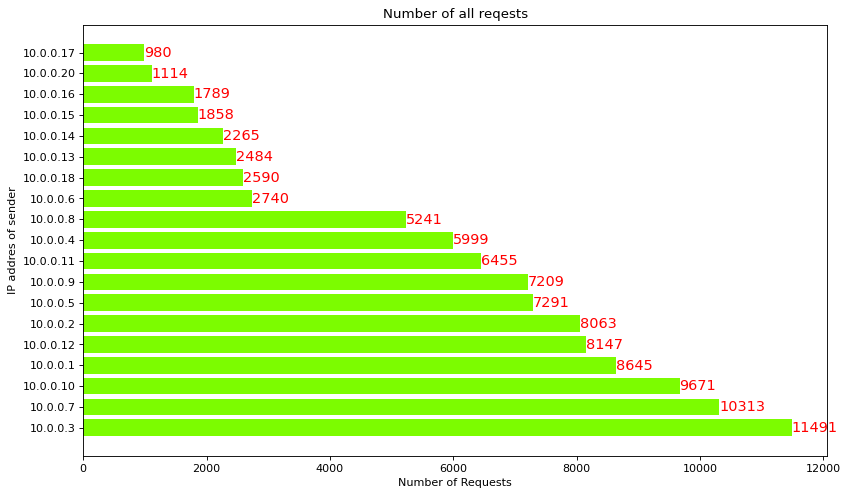

In [ ]:
#### Let's look at Oblect columns (Source Destination Protocol)

figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of all reqests')

Text(0.5, 1.0, 'Number of Attack requests')

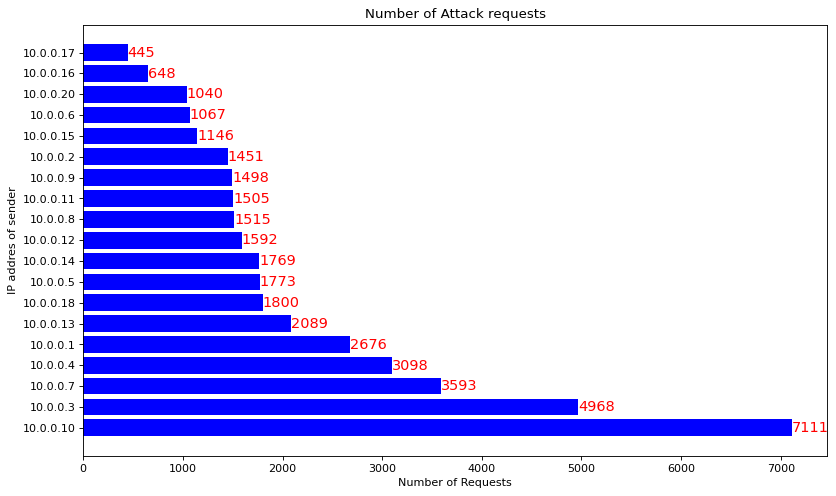

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.title('Number of Attack requests')

Text(0.5, 1.0, 'Number of requests from different IP adress')

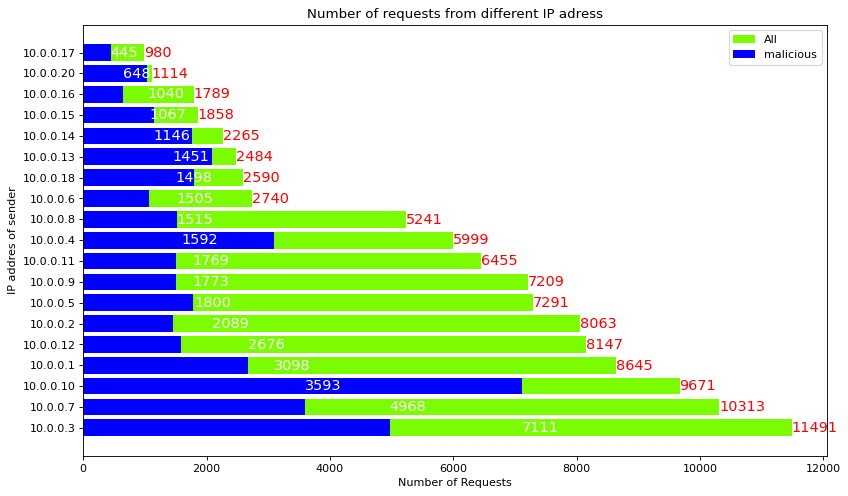

In [ ]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(data.src.value_counts()).keys()), dict(data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(data[data.label == 1].src.value_counts()).keys()), dict(data[data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(data[data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

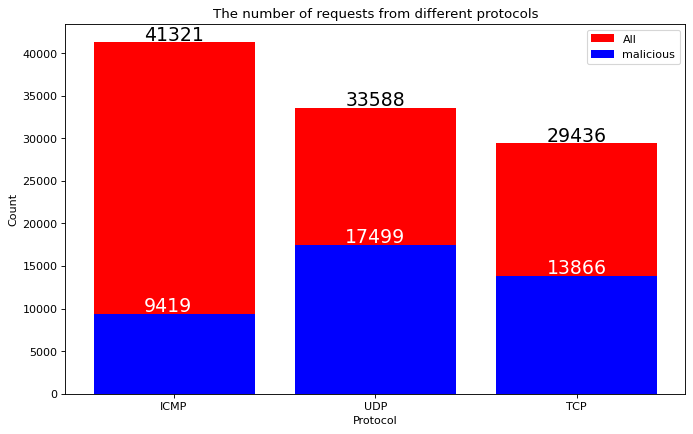

In [ ]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(data.Protocol.value_counts()).keys()), dict(data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(data[data.label == 1].Protocol.value_counts()).keys()), dict(data[data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [ ]:
df = data.copy()

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.dur, bins=20, color='b')
plt.title('Duration')
plt.show()

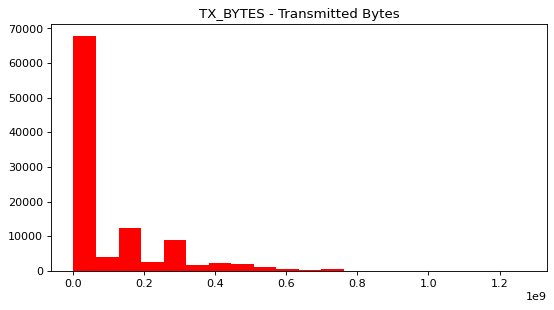

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_bytes, bins=20, color='r')
plt.title('TX_BYTES - Transmitted Bytes')
plt.show()

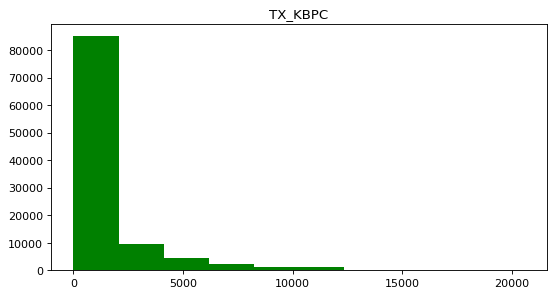

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.hist(df.tx_kbps, bins=10, color='g')
plt.title('TX_KBPS')
plt.show()

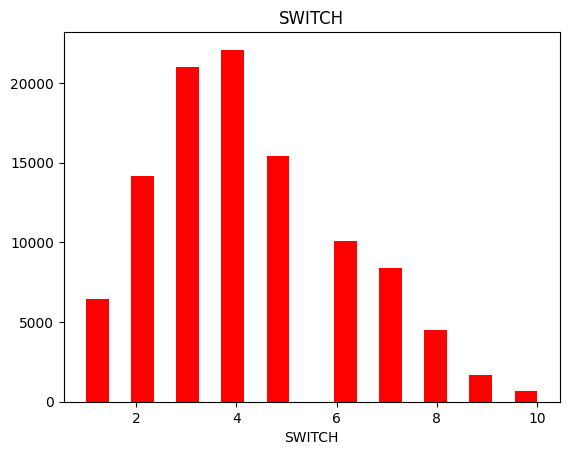

In [ ]:
plt.hist(df.switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

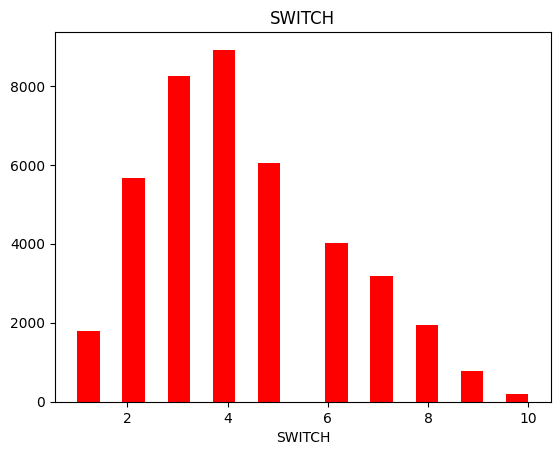

In [ ]:
plt.hist(df[df['label'] == 1].switch, bins=20, color='r')
plt.title('SWITCH')
plt.xlabel('SWITCH')
plt.show()

### After EDA

In [ ]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to each numeric column
for column in numeric_columns:
    # Separate positive and zero/negative values
    positive_values = df[column][df[column] > 0]
    zero_or_negative_values = df[column][df[column] <= 0]

    # Check if there are non-constant positive values
    if not positive_values.empty and positive_values.nunique() > 1:
        # Apply Box-Cox transformation to positive values
        transformed_positive_values, lambda_ = boxcox(positive_values)
        df.loc[positive_values.index, column] = transformed_positive_values

    # Handle zero or negative values separately
    if not zero_or_negative_values.empty:
        # Add a small constant to avoid taking log of zero
        df.loc[zero_or_negative_values.index, column] = np.log(zero_or_negative_values + 1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


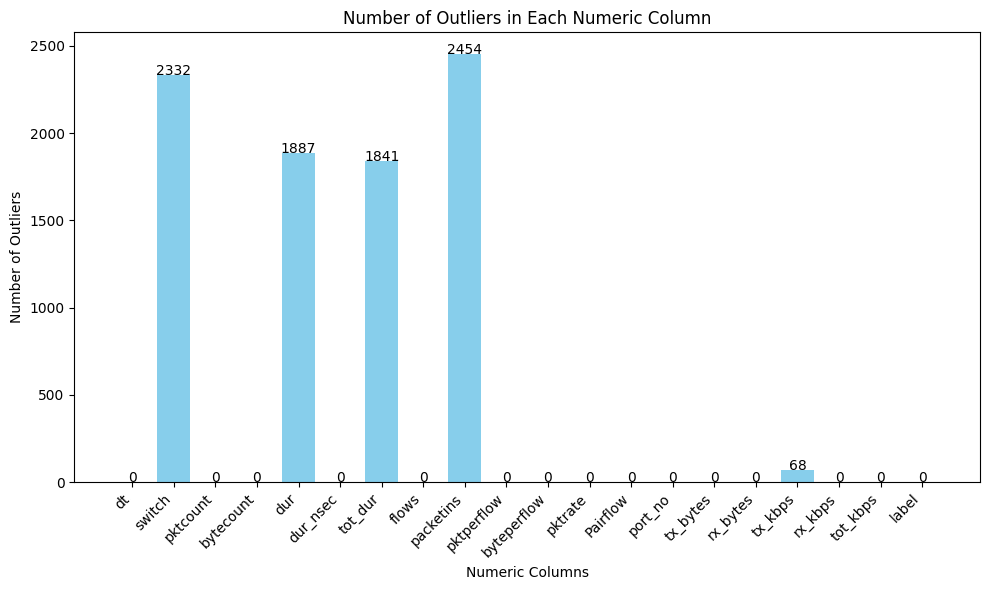

In [ ]:
outlier_counts = {}

# Iterate over each numeric column for outlier detection
for column in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Count the number of outliers for the column
    outlier_counts[column] = len(outliers)

# Create a bar plot of outlier counts
plt.figure(figsize=(10, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue')
plt.xlabel('Numeric Columns')
plt.ylabel('Number of Outliers')
plt.title('Number of Outliers in Each Numeric Column')
plt.xticks(rotation=45, ha='right')

# Display the number of outliers on top of each bar
for column, count in outlier_counts.items():
    plt.text(column, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
df.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = df[df['label'] == 0]
minority_class = df[df['label'] == 1]

# Undersample majority class
undersampled_majority = resample(majority_class,
                                 replace=False,
                                 n_samples=len(minority_class),
                                 random_state=42)

# Combine minority class with undersampled majority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
undersampled_df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,63.460114,0.830628,10.0.0.10,10.0.0.8,72.113080,65.483353,16.562354,295067.814546,12765.853971,0.688446,...,78.239521,0,UDP,1.834901,8.439522,10.641362,0.000000,0.000000,0.000000,1
1,63.011232,0.000000,10.0.0.2,10.0.0.8,75.116997,66.998160,15.158278,294608.053427,11824.855405,1.086834,...,60.511967,0,UDP,1.834901,8.545792,37.344489,0.000000,18.452007,36.022646,1
2,90.683769,0.830628,10.0.0.11,10.0.0.3,18.797215,23.953474,22.688086,243387.450508,16917.837634,2.150446,...,0.000000,1,ICMP,1.834901,20.043301,36.454278,14.434615,18.764262,46.929820,0
3,38.965642,0.830628,10.0.0.10,10.0.0.3,73.215389,65.969637,16.913103,330591.455153,13001.538754,1.086834,...,102.962042,0,UDP,0.000000,8.490247,9.026328,0.000000,0.000000,0.000000,1
4,59.639157,2.488507,10.0.0.12,10.0.0.7,63.813707,61.876595,11.789409,321805.056838,9585.384967,1.086834,...,151.909034,0,UDP,0.795071,8.260165,10.533010,0.000000,0.000000,0.000000,0


In [ ]:
undersampled_df.drop(columns=['src', 'dst', 'dt'], inplace=True)

In [ ]:
undersampled_df.isnull().sum()

switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow     171
byteperflow    171
pktrate        171
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        426
tot_kbps       426
label            0
dtype: int64

In [ ]:
encoder = LabelEncoder()
encoded_values = undersampled_df['Protocol'] = encoder.fit_transform(undersampled_df['Protocol'])

In [ ]:
for protocol_class in encoder.classes_:
    encoded_value = encoder.transform([protocol_class])[0]
    print(f"{protocol_class} is encoded as {encoded_value}")

ICMP is encoded as 0
TCP is encoded as 1
UDP is encoded as 2


In [ ]:
def remove_null(df):
    # Handling missing values
    imputer = SimpleImputer(strategy='mean')
    df[['rx_kbps', 'tot_kbps', 'pktperflow', 'byteperflow', 'pktrate']] = imputer.fit_transform(df[['rx_kbps', 'tot_kbps', 'pktperflow', 'byteperflow', 'pktrate']])

In [ ]:
remove_null(undersampled_df)

In [ ]:
undersampled_df.label.value_counts()

label
1    40784
0    40784
Name: count, dtype: int64

# Applying Dimensionaltiy Reduction

In [ ]:
X = undersampled_df.drop(columns=['label'])
feature_names = X.columns
y = undersampled_df['label']

In [ ]:
def pca(X, n_components, feature_names):
    # Standardize the data
    X_std = (X - X.mean(axis=0)) / X.std(axis=0)

    # Compute the covariance matrix
    cov_matrix = np.cov(X_std.T)

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # Sort the eigenvalues and eigenvectors in descending order
    indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:, indices]

    # Select the top n_components eigenvectors
    principal_components = eigenvectors[:, :n_components]

    # Project the data onto the principal components
    transformed_data = np.dot(X_std, principal_components)

    # Compute the explained variance ratio
    explained_variance_ratio = eigenvalues[:n_components] / np.sum(eigenvalues)

    feature_contributions = []

    # Compute and store the contribution of each feature to the principal components
    for i in range(n_components):
        component_contributions = [(feature_names[j], principal_components[j, i]) for j in range(len(feature_names))]
        component_contributions.sort(key=lambda x: abs(x[1]), reverse=True)
        feature_contributions.append(component_contributions)

    # Print the contribution of each feature to the principal components
    for i, component_contributions in enumerate(feature_contributions):
        print(f"Principal Component {i+1}:")
        for feature_name, contribution in component_contributions:
            print(f"{feature_name}: {contribution:.4f}")
        print()

    return transformed_data, principal_components, explained_variance_ratio

# Model Trainer class

## This gives 10 components and trains different models and prints the accuracy and confusion matrix.

In [ ]:


import seaborn as sns

class ModelTrainer:
    def __init__(self, X, y, n_components, feature_names):
        self.X, self.y = X, y
        self.transformed_X, self.principal_components, self.explained_variance_ratio = pca(X, n_components, feature_names)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.transformed_X, self.y, test_size=0.3, random_state=42)
        self.accuracies = {}
        self.svm_model = None
        print("-------------------------")
        print(pca(X, n_components, feature_names))


    def train_logistic_regression(self):
        start_time = time.time()
        lr = LogisticRegression().fit(self.X_train, self.y_train)
        predicted_lr = lr.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print(f"Logistic Regression Accuracy: {round(accuracy_lr * 100, 2)}%")
        print(classification_report(predicted_lr, self.y_test))
        print("Confusion Matrix:")
        cf_lr = confusion_matrix(self.y_test, predicted_lr)
        sns.heatmap(cf_lr, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for Logistic Regression")
        self.accuracies['Logistic Regression'] = accuracy_lr



    def train_svm(self, kernel):
        start_time = time.time()
        if kernel == 'linear':
            self.svm_model = svm.SVC(kernel='linear').fit(self.X_train, self.y_train)
        elif kernel == 'rbf':
            self.svm_model = svm.SVC(kernel='rbf').fit(self.X_train, self.y_train)
        else:
            raise ValueError("Unsupported kernel type. Choose from 'linear' or 'poly'.")

        predicted_svm = self.svm_model.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"SVM Accuracy with {kernel} kernel: {round(accuracy_svm * 100, 2)}%")
        print(classification_report(predicted_svm, self.y_test))
        print("Confusion Matrix:")
        cf_svm = confusion_matrix(self.y_test, predicted_svm)
        sns.heatmap(cf_svm, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for SVM")
        self.accuracies[f'SVM ({kernel} kernel)'] = accuracy_svm




    def train_knn(self):
        start_time = time.time()
        knn = KNeighborsClassifier(n_neighbors=30).fit(self.X_train, self.y_train)
        predicted_knn = knn.predict(self.X_test)
        accuracy_knn = accuracy_score(self.y_test, predicted_knn)
        print(f"KNN Accuracy: {round(accuracy_knn * 100, 2)}%")
        print(classification_report(predicted_knn, self.y_test))
        print("Confusion Matrix:")
        cf_knn = confusion_matrix(self.y_test, predicted_knn)
        sns.heatmap(cf_knn, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for KNN")
        self.accuracies['KNN (k = 2)'] = accuracy_knn



    def train_decision_tree(self):
        start_time = time.time()
        dt = DecisionTreeClassifier().fit(self.X_train, self.y_train)
        predicted_dt = dt.predict(self.X_test)
        accuracy_dt = accuracy_score(self.y_test, predicted_dt)
        print(f"Decision Tree Accuracy: {round(accuracy_dt * 100, 2)}%")
        print(classification_report(predicted_dt, self.y_test))
        print("Confusion Matrix:")
        cf_dt = confusion_matrix(self.y_test, predicted_dt)
        sns.heatmap(cf_dt, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for Decision Tree")
        self.accuracies['Decision Tree'] = accuracy_dt


    def train_random_forest(self):
        start_time = time.time()
        rf = RandomForestClassifier().fit(self.X_train, self.y_train)
        predicted_rf = rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)
        print(f"Random Forest Accuracy: {round(accuracy_rf * 100, 2)}%")
        print(classification_report(predicted_rf, self.y_test))
        print("Confusion Matrix:")
        cf_rf = confusion_matrix(self.y_test, predicted_rf)
        sns.heatmap(cf_rf, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for Random Forest")
        self.accuracies['Random Forest'] = accuracy_rf

    def train_gradient_boosting(self):
        start_time = time.time()
        gb = GradientBoostingClassifier().fit(self.X_train, self.y_train)
        predicted_gb = gb.predict(self.X_test)
        accuracy_gb = accuracy_score(self.y_test, predicted_gb)
        print(f"Gradient Boosting Accuracy: {round(accuracy_gb * 100, 2)}%")
        print(classification_report(predicted_gb, self.y_test))
        print("Confusion Matrix:")
        cf_gb = confusion_matrix(self.y_test, predicted_gb)
        sns.heatmap(cf_gb, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for Gradient Boosting")
        self.accuracies['Gradient Boosting'] = accuracy_gb

    def train_ada_boost(self):
        start_time = time.time()
        ada = AdaBoostClassifier().fit(self.X_train, self.y_train)
        predicted_ada = ada.predict(self.X_test)
        accuracy_ada = accuracy_score(self.y_test, predicted_ada)
        print(f"AdaBoost Accuracy: {round(accuracy_ada * 100, 2)}%")
        print(classification_report(predicted_ada, self.y_test))
        print("Confusion Matrix:")
        cf_ada = confusion_matrix(self.y_test, predicted_ada)
        sns.heatmap(cf_ada, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for AdaBoost")
        self.accuracies['AdaBoost'] = accuracy_ada


    def train_naive_bayes(self):
        start_time = time.time()
        nb = GaussianNB().fit(self.X_train, self.y_train)
        predicted_nb = nb.predict(self.X_test)
        accuracy_nb = accuracy_score(self.y_test, predicted_nb)
        print(f"Naive Bayes Accuracy: {round(accuracy_nb * 100, 2)}%")
        print(classification_report(predicted_nb, self.y_test))
        print("Confusion Matrix:")
        cf_nb = confusion_matrix(self.y_test, predicted_nb)
        sns.heatmap(cf_nb, annot=True, cmap='Blues', fmt='.0f')
        plt.show()
        print(f"--- {time.time() - start_time:.2f} seconds --- for Naive Bayes")
        self.accuracies['Naive Bayes'] = accuracy_nb


    def plot_accuracies(self):
        classifiers = list(self.accuracies.keys())
        accuracies = list(self.accuracies.values())

        plt.figure(figsize=(10, 6))
        plt.barh(classifiers, accuracies, color='skyblue')
        plt.xlabel('Accuracy')
        plt.ylabel('Classifier')
        plt.title('Accuracy of Different Classifiers')
        plt.show()



In [ ]:
model_trainer = ModelTrainer(X, y, n_components=10, feature_names=feature_names)

Principal Component 1:
pktperflow: 0.3835
byteperflow: 0.3809
pktrate: 0.3766
Protocol: 0.3621
bytecount: 0.3619
pktcount: 0.3390
flows: -0.2213
Pairflow: -0.2172
tx_bytes: -0.1558
tot_dur: -0.1504
dur: -0.1481
rx_bytes: -0.1156
packetins: 0.0535
dur_nsec: 0.0533
tot_kbps: 0.0517
rx_kbps: 0.0321
switch: -0.0320
port_no: -0.0160
tx_kbps: 0.0060

Principal Component 2:
tot_kbps: 0.4541
tx_kbps: 0.3938
rx_kbps: 0.3872
tx_bytes: 0.3553
rx_bytes: 0.3403
Pairflow: 0.2375
flows: 0.2201
packetins: 0.1923
port_no: 0.1774
pktperflow: 0.1404
pktrate: 0.1396
pktcount: 0.1065
Protocol: -0.0948
byteperflow: 0.0738
dur_nsec: -0.0688
switch: 0.0392
bytecount: 0.0279
tot_dur: -0.0270
dur: -0.0254

Principal Component 3:
dur: -0.5978
tot_dur: -0.5963
pktcount: -0.3028
bytecount: -0.2024
tot_kbps: 0.1728
packetins: -0.1401
byteperflow: -0.1336
Protocol: 0.1241
Pairflow: -0.1225
rx_kbps: 0.1204
tx_kbps: 0.1066
pktperflow: -0.0973
rx_bytes: -0.0921
tx_bytes: -0.0888
pktrate: -0.0530
port_no: 0.0321
dur_nse

Logistic Regression Accuracy: 64.73%
              precision    recall  f1-score   support

           0       0.55      0.68      0.61      9900
           1       0.74      0.62      0.68     14571

    accuracy                           0.65     24471
   macro avg       0.65      0.65      0.64     24471
weighted avg       0.67      0.65      0.65     24471

Confusion Matrix:


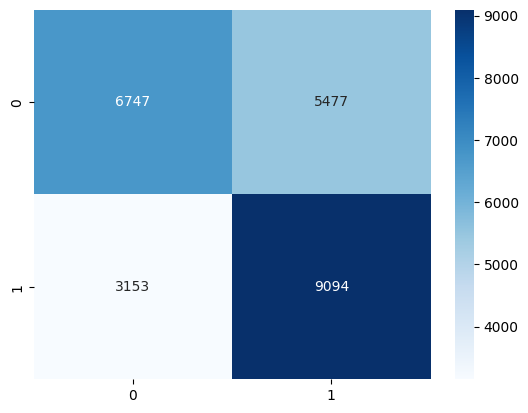

--- 0.35 seconds --- for Logistic Regression
Naive Bayes Accuracy: 73.21%
              precision    recall  f1-score   support

           0       0.61      0.80      0.70      9305
           1       0.85      0.69      0.76     15166

    accuracy                           0.73     24471
   macro avg       0.73      0.75      0.73     24471
weighted avg       0.76      0.73      0.74     24471

Confusion Matrix:


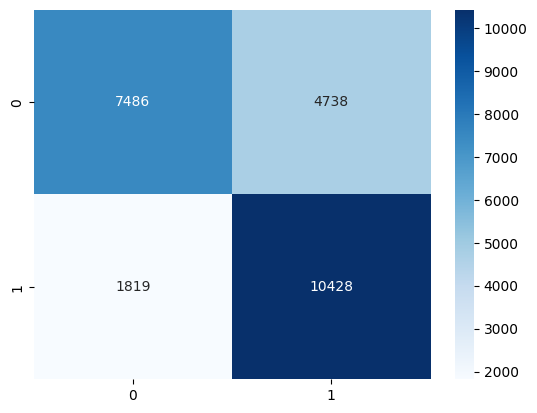

--- 0.29 seconds --- for Naive Bayes


In [ ]:
model_trainer.train_logistic_regression()
model_trainer.train_naive_bayes()

KNN Accuracy: 94.26%
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11807
           1       0.96      0.93      0.94     12664

    accuracy                           0.94     24471
   macro avg       0.94      0.94      0.94     24471
weighted avg       0.94      0.94      0.94     24471

Confusion Matrix:


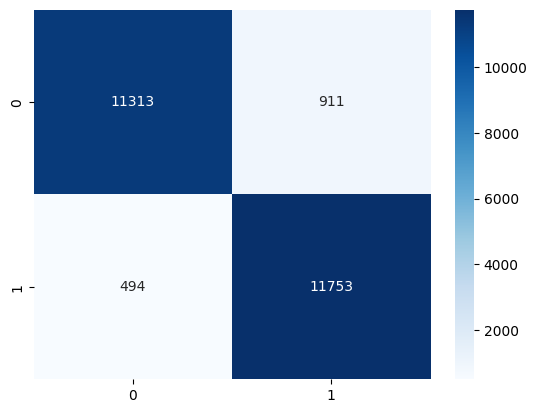

--- 4.39 seconds --- for KNN


In [ ]:
model_trainer.train_knn()

SVM Accuracy with linear kernel: 67.9%
              precision    recall  f1-score   support

           0       0.51      0.77      0.61      8097
           1       0.85      0.63      0.73     16374

    accuracy                           0.68     24471
   macro avg       0.68      0.70      0.67     24471
weighted avg       0.74      0.68      0.69     24471

Confusion Matrix:


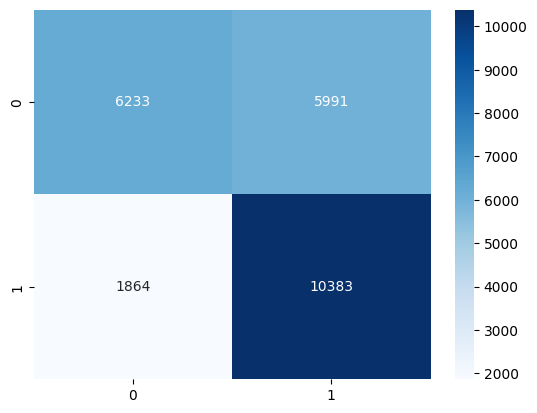

--- 377.59 seconds --- for SVM


In [ ]:
model_trainer.train_svm(kernel="linear")

SVM Accuracy with rbf kernel: 95.63%
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11628
           1       0.98      0.94      0.96     12843

    accuracy                           0.96     24471
   macro avg       0.96      0.96      0.96     24471
weighted avg       0.96      0.96      0.96     24471

Confusion Matrix:


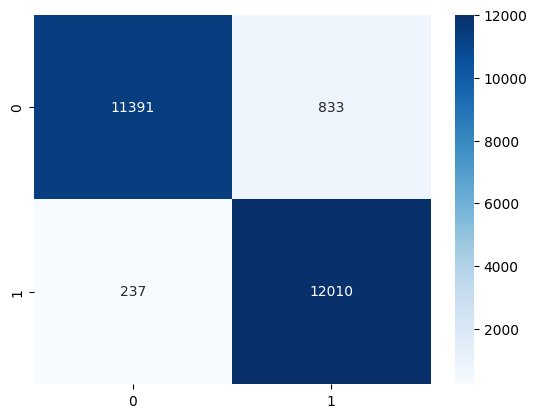

--- 42.53 seconds --- for SVM


In [ ]:
model_trainer.train_svm(kernel="rbf")

Decision Tree Accuracy: 95.71%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12228
           1       0.96      0.96      0.96     12243

    accuracy                           0.96     24471
   macro avg       0.96      0.96      0.96     24471
weighted avg       0.96      0.96      0.96     24471

Confusion Matrix:


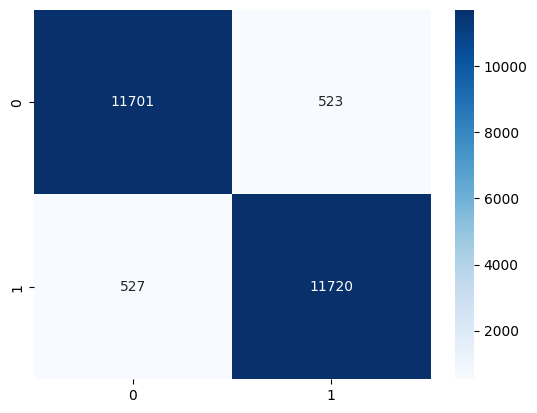

--- 1.30 seconds --- for Decision Tree
Gradient Boosting Accuracy: 91.48%
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     10922
           1       0.97      0.87      0.92     13549

    accuracy                           0.91     24471
   macro avg       0.91      0.92      0.91     24471
weighted avg       0.92      0.91      0.92     24471

Confusion Matrix:


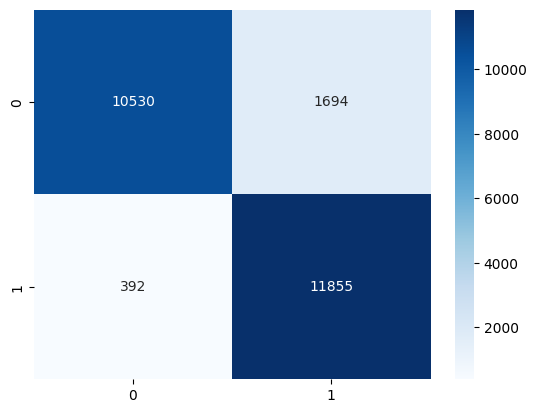

--- 25.27 seconds --- for Gradient Boosting
Random Forest Accuracy: 98.05%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11986
           1       0.99      0.97      0.98     12485

    accuracy                           0.98     24471
   macro avg       0.98      0.98      0.98     24471
weighted avg       0.98      0.98      0.98     24471

Confusion Matrix:


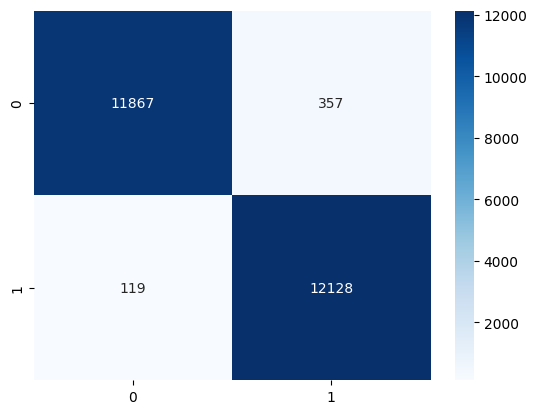

--- 19.64 seconds --- for Random Forest
AdaBoost Accuracy: 87.2%
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     11128
           1       0.92      0.84      0.88     13343

    accuracy                           0.87     24471
   macro avg       0.87      0.88      0.87     24471
weighted avg       0.88      0.87      0.87     24471

Confusion Matrix:


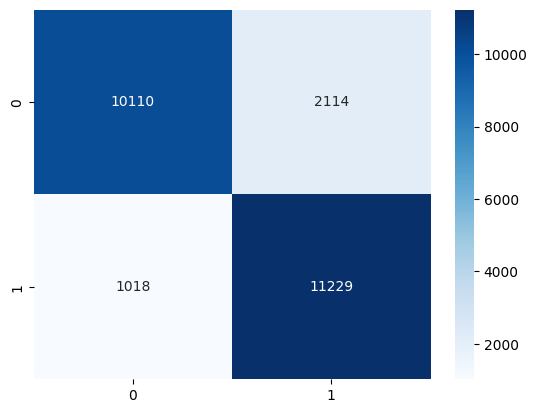

--- 6.17 seconds --- for AdaBoost


In [ ]:
model_trainer.train_decision_tree()
model_trainer.train_gradient_boosting()
model_trainer.train_random_forest()
model_trainer.train_ada_boost()

In [ ]:
model_trainer.accuracies

{'KNN (k = 2)': 0.942585100731478}

In [ ]:
model_trainer.accuracies

{'Logistic Regression': 0.6473376649912141,
 'Naive Bayes': 0.7320501818479016,
 'KNN (k = 2)': 0.9450369825507744,
 'SVM (linear kernel)': 0.6790078051571248,
 'SVM (rbf kernel)': 0.9562747742225491,
 'Decision Tree': 0.9570920681623146,
 'Gradient Boosting': 0.914756242082465,
 'Random Forest': 0.9805484042335826,
 'AdaBoost': 0.8720117690327326}

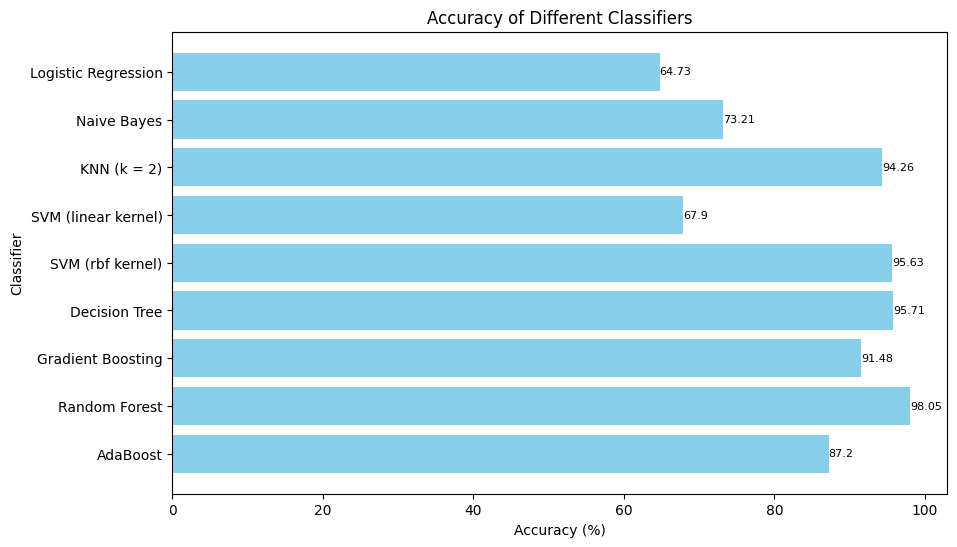

In [ ]:
import matplotlib.pyplot as plt

var1 = {'Logistic Regression': 0.6473376649912141,
 'Naive Bayes': 0.7320501818479016,
 'KNN (k = 2)': 0.942585100731478,
 'SVM (linear kernel)': 0.6790078051571248,
 'SVM (rbf kernel)': 0.9562747742225491,
 'Decision Tree': 0.9570920681623146,
 'Gradient Boosting': 0.914756242082465,
 'Random Forest': 0.9805484042335826,
 'AdaBoost': 0.8720117690327326}

classifiers = list(var1.keys())[::-1]  # Reverse the order of keys
accuracies = [round(acc * 100, 2) for acc in var1.values()][::-1]  # Reverse the order of values

plt.figure(figsize=(10, 6))
bars = plt.barh(classifiers, accuracies, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.ylabel('Classifier')
plt.title('Accuracy of Different Classifiers')

# Adding accuracy values on top of each bar
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{acc}',
             va='center', ha='left', fontsize=8, color='black')

plt.show()